## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  71.612112  1598.062045  0.498471  1.488087  799.771846
1  89.420004  1420.031056  0.083146  2.308843  148.084382
2  99.931844  1529.948315  0.626947  7.828325  964.412714
3  77.427386   559.894242  0.795363  5.338045  451.895707
4  49.450109  1621.512812  0.157301  4.288667  259.663874


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8546469	total: 58ms	remaining: 57.9s
1:	learn: 0.8458615	total: 58.6ms	remaining: 29.2s
2:	learn: 0.8384470	total: 58.9ms	remaining: 19.6s
3:	learn: 0.8299695	total: 59.4ms	remaining: 14.8s
4:	learn: 0.8185324	total: 60.1ms	remaining: 12s
5:	learn: 0.8118352	total: 60.5ms	remaining: 10s
6:	learn: 0.8013003	total: 61ms	remaining: 8.66s
7:	learn: 0.7900305	total: 61.5ms	remaining: 7.62s
8:	learn: 0.7805614	total: 61.9ms	remaining: 6.82s
9:	learn: 0.7699292	total: 62.2ms	remaining: 6.16s
10:	learn: 0.7614827	total: 62.9ms	remaining: 5.65s
11:	learn: 0.7495509	total: 63.3ms	remaining: 5.21s
12:	learn: 0.7400040	total: 63.9ms	remaining: 4.85s
13:	learn: 0.7299476	total: 64.1ms	remaining: 4.52s
14:	learn: 0.7203737	total: 64.6ms	remaining: 4.24s
15:	learn: 0.7114135	total: 65.1ms	remaining: 4s
16:	learn: 0.7024311	total: 65.6ms	remaining: 3.79s
17:	learn: 0.6938929	total: 66ms	remaining: 3.6s
18:	learn: 0.6869209	total: 66.4ms	remaining: 3.43s
19:	le

107:	learn: 0.2588534	total: 106ms	remaining: 874ms
108:	learn: 0.2565360	total: 106ms	remaining: 870ms
109:	learn: 0.2540124	total: 107ms	remaining: 864ms
110:	learn: 0.2516295	total: 107ms	remaining: 858ms
111:	learn: 0.2492410	total: 108ms	remaining: 853ms
112:	learn: 0.2466088	total: 108ms	remaining: 848ms
113:	learn: 0.2442327	total: 109ms	remaining: 844ms
114:	learn: 0.2419470	total: 109ms	remaining: 839ms
115:	learn: 0.2392992	total: 109ms	remaining: 834ms
116:	learn: 0.2364435	total: 110ms	remaining: 828ms
117:	learn: 0.2339032	total: 110ms	remaining: 824ms
118:	learn: 0.2319797	total: 111ms	remaining: 820ms
119:	learn: 0.2295210	total: 111ms	remaining: 814ms
120:	learn: 0.2267455	total: 112ms	remaining: 810ms
121:	learn: 0.2251298	total: 112ms	remaining: 806ms
122:	learn: 0.2235854	total: 112ms	remaining: 802ms
123:	learn: 0.2216625	total: 113ms	remaining: 798ms
124:	learn: 0.2191355	total: 113ms	remaining: 793ms
125:	learn: 0.2176807	total: 114ms	remaining: 788ms
126:	learn: 

288:	learn: 0.0606939	total: 185ms	remaining: 456ms
289:	learn: 0.0603525	total: 186ms	remaining: 455ms
290:	learn: 0.0599292	total: 186ms	remaining: 453ms
291:	learn: 0.0595416	total: 186ms	remaining: 452ms
292:	learn: 0.0591153	total: 187ms	remaining: 451ms
293:	learn: 0.0586544	total: 187ms	remaining: 450ms
294:	learn: 0.0584025	total: 188ms	remaining: 449ms
295:	learn: 0.0580405	total: 188ms	remaining: 448ms
296:	learn: 0.0577293	total: 189ms	remaining: 446ms
297:	learn: 0.0574592	total: 189ms	remaining: 445ms
298:	learn: 0.0570535	total: 190ms	remaining: 444ms
299:	learn: 0.0567653	total: 190ms	remaining: 443ms
300:	learn: 0.0565018	total: 190ms	remaining: 442ms
301:	learn: 0.0562269	total: 191ms	remaining: 441ms
302:	learn: 0.0559528	total: 191ms	remaining: 440ms
303:	learn: 0.0556129	total: 192ms	remaining: 439ms
304:	learn: 0.0551997	total: 192ms	remaining: 438ms
305:	learn: 0.0548400	total: 193ms	remaining: 437ms
306:	learn: 0.0545714	total: 193ms	remaining: 436ms
307:	learn: 

519:	learn: 0.0196466	total: 287ms	remaining: 265ms
520:	learn: 0.0195483	total: 287ms	remaining: 264ms
521:	learn: 0.0195078	total: 288ms	remaining: 263ms
522:	learn: 0.0193842	total: 288ms	remaining: 263ms
523:	learn: 0.0193493	total: 288ms	remaining: 262ms
524:	learn: 0.0192278	total: 289ms	remaining: 261ms
525:	learn: 0.0191328	total: 289ms	remaining: 260ms
526:	learn: 0.0190988	total: 289ms	remaining: 260ms
527:	learn: 0.0190652	total: 290ms	remaining: 259ms
528:	learn: 0.0189599	total: 290ms	remaining: 258ms
529:	learn: 0.0188533	total: 290ms	remaining: 257ms
530:	learn: 0.0188142	total: 291ms	remaining: 257ms
531:	learn: 0.0187117	total: 291ms	remaining: 256ms
532:	learn: 0.0185931	total: 291ms	remaining: 255ms
533:	learn: 0.0185560	total: 291ms	remaining: 254ms
534:	learn: 0.0185183	total: 293ms	remaining: 254ms
535:	learn: 0.0184041	total: 293ms	remaining: 254ms
536:	learn: 0.0183147	total: 294ms	remaining: 253ms
537:	learn: 0.0182779	total: 294ms	remaining: 253ms
538:	learn: 

701:	learn: 0.0094942	total: 366ms	remaining: 155ms
702:	learn: 0.0094427	total: 366ms	remaining: 155ms
703:	learn: 0.0093979	total: 367ms	remaining: 154ms
704:	learn: 0.0093679	total: 367ms	remaining: 154ms
705:	learn: 0.0093276	total: 368ms	remaining: 153ms
706:	learn: 0.0092775	total: 368ms	remaining: 153ms
707:	learn: 0.0092343	total: 369ms	remaining: 152ms
708:	learn: 0.0092123	total: 369ms	remaining: 151ms
709:	learn: 0.0091736	total: 369ms	remaining: 151ms
710:	learn: 0.0091451	total: 370ms	remaining: 150ms
711:	learn: 0.0091066	total: 370ms	remaining: 150ms
712:	learn: 0.0090598	total: 371ms	remaining: 149ms
713:	learn: 0.0090389	total: 371ms	remaining: 149ms
714:	learn: 0.0089987	total: 371ms	remaining: 148ms
715:	learn: 0.0089713	total: 372ms	remaining: 147ms
716:	learn: 0.0089313	total: 372ms	remaining: 147ms
717:	learn: 0.0089111	total: 373ms	remaining: 146ms
718:	learn: 0.0088698	total: 373ms	remaining: 146ms
719:	learn: 0.0088434	total: 373ms	remaining: 145ms
720:	learn: 

917:	learn: 0.0049648	total: 471ms	remaining: 42ms
918:	learn: 0.0049468	total: 471ms	remaining: 41.5ms
919:	learn: 0.0049310	total: 472ms	remaining: 41ms
920:	learn: 0.0049176	total: 472ms	remaining: 40.5ms
921:	learn: 0.0049150	total: 473ms	remaining: 40ms
922:	learn: 0.0049018	total: 473ms	remaining: 39.4ms
923:	learn: 0.0048984	total: 473ms	remaining: 38.9ms
924:	learn: 0.0048870	total: 474ms	remaining: 38.4ms
925:	learn: 0.0048836	total: 474ms	remaining: 37.9ms
926:	learn: 0.0048708	total: 475ms	remaining: 37.4ms
927:	learn: 0.0048557	total: 475ms	remaining: 36.9ms
928:	learn: 0.0048532	total: 476ms	remaining: 36.3ms
929:	learn: 0.0048374	total: 476ms	remaining: 35.8ms
930:	learn: 0.0048249	total: 476ms	remaining: 35.3ms
931:	learn: 0.0048123	total: 477ms	remaining: 34.8ms
932:	learn: 0.0047990	total: 477ms	remaining: 34.3ms
933:	learn: 0.0047837	total: 477ms	remaining: 33.7ms
934:	learn: 0.0047709	total: 478ms	remaining: 33.2ms
935:	learn: 0.0047545	total: 478ms	remaining: 32.7ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

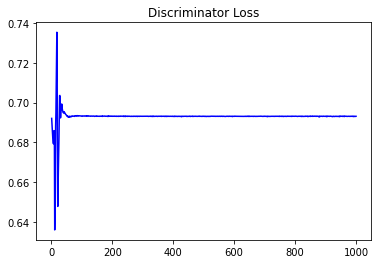

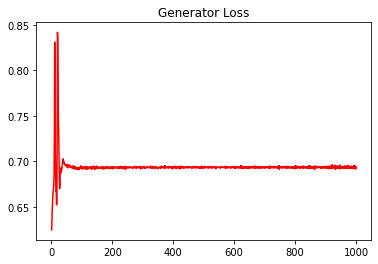

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06595859855010615


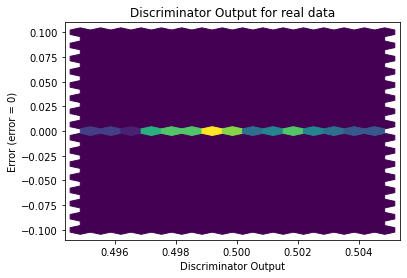

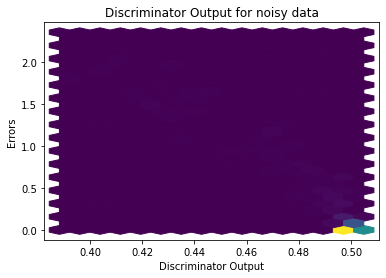

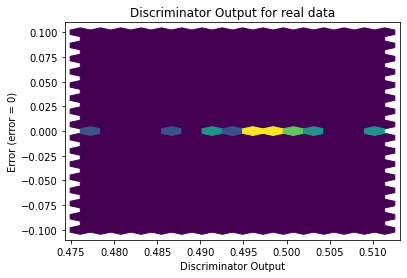

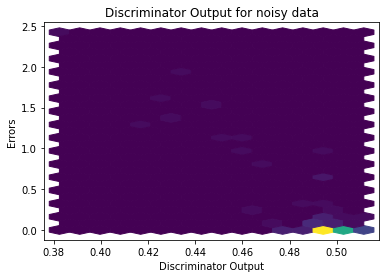

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


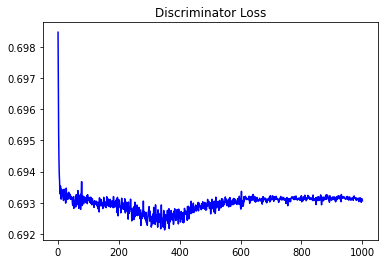

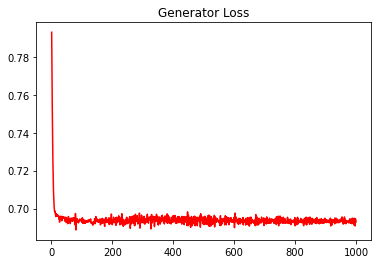

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10990879385980853


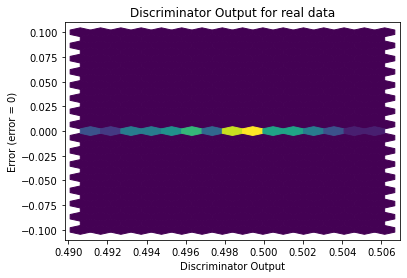

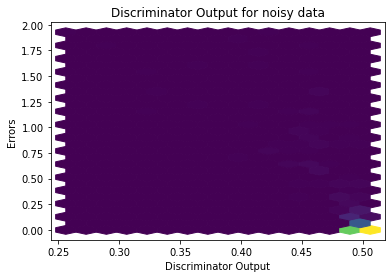

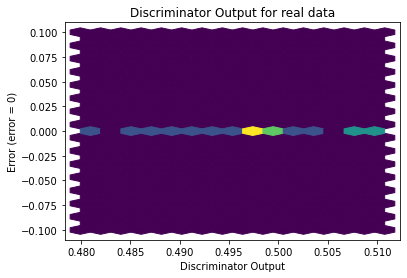

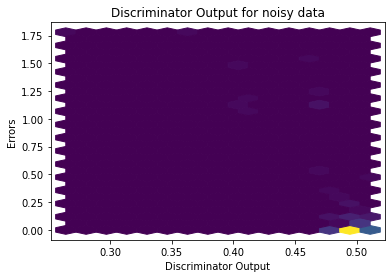

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1261]], requires_grad=True)
